In [1]:
import random

import cv2
import matplotlib.pyplot as plt
import numpy as np
import albumentations as A

In [2]:
def show(image):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)

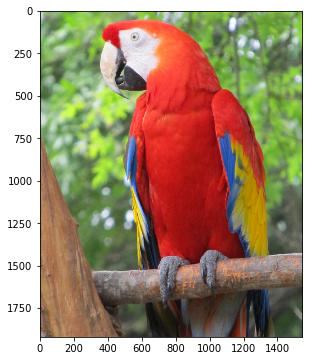

In [3]:
# Let's load an image
image = cv2.imread('./images/parrot.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
show(image)

## Using A.save() and A.load() to serialize a transform pipeline to a JSON or YAML file

### We define a transform pipeline

In [4]:
transform = A.Compose([
    A.RandomCrop(768, 768),
    A.OneOf([
        A.RGBShift(), 
        A.HueSaturationValue()
    ]),
])
print(transform)

Compose([
  RandomCrop(always_apply=False, p=1.0, height=768, width=768),
  OneOf([
    RGBShift(always_apply=False, p=0.5, r_shift_limit=(-20, 20), g_shift_limit=(-20, 20), b_shift_limit=(-20, 20)),
    HueSaturationValue(always_apply=False, p=0.5, hue_shift_limit=(-20, 20), sat_shift_limit=(-30, 30), val_shift_limit=(-20, 20)),
  ], p=0.5),
], p=1.0)


### Next, we fix the random seed so we can reproduce the result later, then we pass the image through the pipeline and show an augmented version.

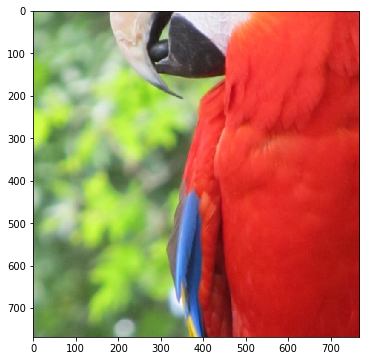

In [5]:
random.seed(42)
augmented_image_1 = transform(image=image)['image']
show(augmented_image_1)

### To serialize an augmentation pipeline to a JSON file, you need to call `A.save` and pass the pipeline and a path to a file.

In [6]:
A.save(transform, '/tmp/transform.json')

### To load a serialized pipeline, you need to call `A.load` and pass a path to a file with a serialized version of the pipeline

In [7]:
loaded_transform = A.load('/tmp/transform.json')
print(loaded_transform)

Compose([
  RandomCrop(always_apply=False, p=1.0, height=768, width=768),
  OneOf([
    RGBShift(always_apply=False, p=0.5, r_shift_limit=(-20, 20), g_shift_limit=(-20, 20), b_shift_limit=(-20, 20)),
    HueSaturationValue(always_apply=False, p=0.5, hue_shift_limit=(-20, 20), sat_shift_limit=(-30, 30), val_shift_limit=(-20, 20)),
  ], p=0.5),
], p=1.0)


### Next, we use the same seed as before, pass the image through the deserialized pipeline and make sure that the original and the deserialized pipelines produce the same result.

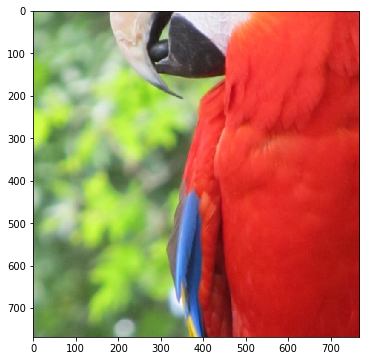

In [8]:
random.seed(42)
augmented_image_2 = loaded_transform(image=image)['image']
show(augmented_image_2)

In [9]:
assert np.array_equal(augmented_image_1, augmented_image_2)

### You can also serialize pipeline to a YAML file by providing `data_format = 'yaml'`.

In [10]:
A.save(transform, '/tmp/transform.yml', data_format='yaml')
loaded_transform = A.load('/tmp/transform.yml', data_format='yaml')

## Using `A.to_dict()` and `A.from_dict()` to serialize a transform pipeline to a Python dictionary.

### If you need more control over a serialized pipeline, e.g., you want to save a serialized version to a database or send it to a server you can use the `A.to_dict` and `A.from_dict` functions. `A.to_dict` returns a Python dictionary that describes a pipeline. The dictionary will contain only primitive data types such as dictionaries, lists, strings, integers, and floats. To construct a pipeline from a dictionary, you need to call `A.from_dict`.

In [11]:
transform_dict = A.to_dict(transform)
loaded_transform = A.from_dict(transform_dict)
print(loaded_transform)

Compose([
  RandomCrop(always_apply=False, p=1.0, height=768, width=768),
  OneOf([
    RGBShift(always_apply=False, p=0.5, r_shift_limit=(-20, 20), g_shift_limit=(-20, 20), b_shift_limit=(-20, 20)),
    HueSaturationValue(always_apply=False, p=0.5, hue_shift_limit=(-20, 20), sat_shift_limit=(-30, 30), val_shift_limit=(-20, 20)),
  ], p=0.5),
], p=1.0)
